In [1]:
# ! pip install scipy


Download the daily close BTC-to-USD data, from 2023-01-01 up to 2023-12-31, available at https: //finance.yahoo.com/quote/BTC-USD (the HistoricalData tab).

Use numpy.genfromtxt or numpy.loadtxt to read the above BTC-to-USD data as a numpy vector named rates.

Option: You can use a spreadsheet application such as LibreOffice Calc or MS Excel to manually remove everything except the numeric values in the Close column. The column labels should also be manually deleted. Export these observations to a CSV file (which should only contain numbers, oneperline). You can also use features in numpy.gen from txt or numpy.loadtxt to remove them.

In [2]:
import numpy as np
import matplotlib.pyplot as plt


data_path = 'BTC-USD.csv'
closeCol = np.genfromtxt(data_path, delimiter=',', skip_header=1, usecols=(4,))

print("Length of Close Column (total days):", len(closeCol))
print(closeCol)



Length of Close Column (total days): 365
[16625.080078 16688.470703 16679.857422 16863.238281 16836.736328
 16951.96875  16955.078125 17091.144531 17196.554688 17446.292969
 17934.896484 18869.587891 19909.574219 20976.298828 20880.798828
 21169.632813 21161.519531 20688.78125  21086.792969 22676.552734
 22777.625    22720.416016 22934.431641 22636.46875  23117.859375
 23032.777344 23078.728516 23031.089844 23774.566406 22840.138672
 23139.283203 23723.769531 23471.871094 23449.322266 23331.847656
 22955.666016 22760.109375 23264.291016 22939.398438 21819.039063
 21651.183594 21870.875    21788.203125 21808.101563 22220.804688
 24307.841797 23623.474609 24565.601563 24641.277344 24327.642578
 24829.148438 24436.353516 24188.84375  23947.492188 23198.126953
 23175.375    23561.212891 23522.871094 23147.353516 23646.550781
 23475.466797 22362.679688 22353.349609 22435.513672 22429.757813
 22219.769531 21718.080078 20363.021484 20187.244141 20632.410156
 22163.949219 24197.533203 24746.07


For the fourth quarter of the year only(Q4 2023;days 274–365 inclusive),determine and display(in a readable manner) the following aggregates:

1.  arithmetic mean: 28091.33
2.  minimum: 25162.65
3.  Q1: 26225.56
4.  median: 28871.82
5.  Q3: 29767.07
6.  maximum: 31476.05
7.  standard deviation: 1827.04
8.  IQR: 3541.51

In [3]:
dateCol = np.genfromtxt(data_path, delimiter=',', skip_header=1, usecols=(0,), dtype=str)

q4_days = np.array(dateCol[273:])
q4_close = np.array(closeCol[273:])

# Calculate descriptive statistics
mean = np.mean(q4_close)
minimum = np.min(q4_close)          # 0-quantile
q1 = np.percentile(q4_close, 25)    # 1st quartile
median = np.median(q4_close)        # 2nd quartile
q3 = np.percentile(q4_close, 75)    # 3rd quartile
maximum = np.max(q4_close)          # 4th quartile
std_dev = np.std(q4_close)
iqr = q3 - q1

print("## Descriptive Statistics of BTC-USD Close Prices")
print(f"Arithmetic Mean: ${mean:.2f}")
print(f"Minimum: ${minimum:.2f}")
print(f"Q1 (25th percentile): ${q1:.2f}")
print(f"Median (50th percentile): ${median:.2f}")
print(f"Q3 (75th percentile): ${q3:.2f}")
print(f"Maximum: ${maximum:.2f}")
print(f"Standard Deviation: ${std_dev:.2f}")
print(f"Interquartile Range (IQR): ${iqr:.2f}")


## Descriptive Statistics of BTC-USD Close Prices
Arithmetic Mean: $36296.43
Minimum: $26756.80
Q1 (25th percentile): $33697.70
Median (50th percentile): $36873.82
Q3 (75th percentile): $42009.92
Maximum: $44166.60
Standard Deviation: $5608.31
Interquartile Range (IQR): $8312.22



Call matplotlib.pyplot.plot(days, rates, <...further_arguments...>) to draw the Q4 2023 data (with 274 denoting 1 October), using red solid line segments. Call matplotlib.pyplot.title to addtheplot title. Discuss what you see.

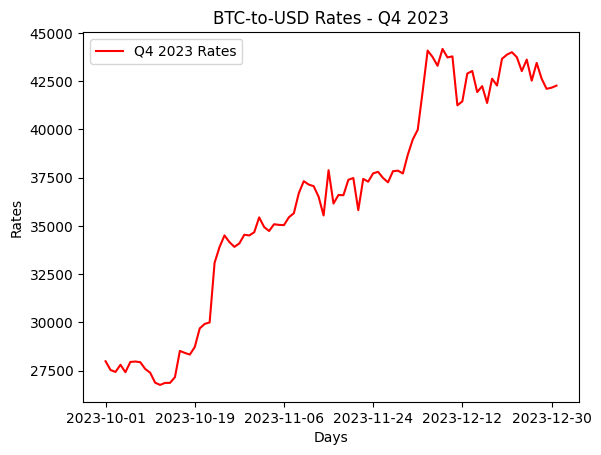

In [4]:

tick_positions = range(0, len(q4_days), round(len(q4_days)/5))
plt.plot(q4_days, q4_close, 'r-', label='Q4 2023 Rates') 
plt.title('BTC-to-USD Rates - Q4 2023')
plt.xlabel('Days') 
plt.ylabel('Rates')  
plt.legend()  
plt.xticks(tick_positions)
plt.show()


    This line graph depicts the Bitcoin (BTC) exchange rate in US dollars (USD) for the fourth quarter (Q4) of 2023. The y-axis represents the exchange rate, while the x-axis shows the date. The graph reveals an initial slight decrease in the BTC-to-USD rate during the first half of October. This was followed by two periods of significant growth. The first period, in late October, saw the price rise from around $28,000 to $35,000. The price then gradually increased until a second period of strong growth in late November, which saw the price reach a peak of over $42,500, nearly reaching $45,000.  After this peak, the price fluctuated throughout the remainder of the quarter but remained above $40,000. Overall, the price of Bitcoin exhibited a steady upward trend throughout Q4 2023, punctuated by two significant spikes in late October and late November.


Determine the day numbers (with 274 denoting 1 October) with the lowest and highest observed prices in Q4 2023. Belowis an example of the lowest and highest price days in Q3 2023.

1.  Lowest price was on day 254 (25162.65).
2.  Highest price was on day 194 (31476.05).

In [5]:
lowest_index = np.where(q4_close == np.min(q4_close))[0][0]
highest_index = np.where(q4_close == np.max(q4_close))[0][0]

# Convert the indices to day numbers with 274 denoting 1 October
lowest_day = lowest_index + 274
highest_day = highest_index + 274

print("Lowest price was on day", lowest_day, q4_days[lowest_index], "(", q4_close[lowest_index], ")")
print("Highest price was on day", highest_day, q4_days[highest_index], "(", q4_close[highest_index], ")")

Lowest price was on day 285 2023-10-12 ( 26756.798828 )
Highest price was on day 342 2023-12-08 ( 44166.601563 )



Using matplotlib.pyplot.boxplot, draw a *horizontal* box-and-whisker plot for the Q4 2023 daily price increases/decreases as obtained by a call to *numpy.diff*. 

Using an additional call to matplotlib.pyplot.plot, mark the arithmetic mean on the box plot with agreen“x”.

In your own words, explain what we can read from the plot.

Mean of the differences between consecutive days: 156.93887362637363
Standard deviation of the differences between consecutive days: 827.2475408267993


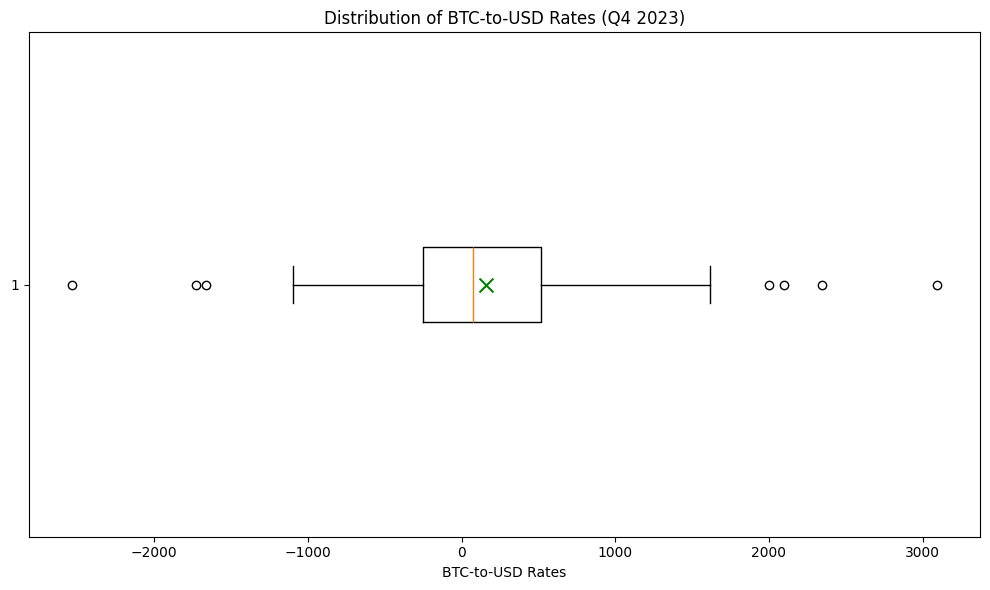

In [6]:
q4_closeDiff = np.diff(q4_close)
mean_diff = np.mean(q4_closeDiff)
print("Mean of the differences between consecutive days:", mean_diff)
print("Standard deviation of the differences between consecutive days:", np.std(q4_closeDiff))

plt.figure(figsize=(10, 6))
plt.boxplot(q4_closeDiff, vert=False)
plt.xlabel('BTC-to-USD Rates')
plt.scatter(mean_diff, 1, color='green', marker='x', s=100, label='Mean')

plt.title('Distribution of BTC-to-USD Rates (Q4 2023)') 
plt.tight_layout()
plt.show()

    The box plot represents the median of the difference of BTC-USD rates around quantiles 1 and 3. The interquartile range is about 600 as IQR of the box plot, which means about 50% of the data between Q1 around -200 to Q3 around +400 is in this interval. This data slightly skewed towards positive values is 1.5 times. This whisker extended from the box, indicating variability outside the upper and lower quartiles and the outliers outside this range plotted differ significantly from the rest of the dataset. It is a useful tool for visualizing data and identifying outliers, skewness, and variability in a dataset.


Count (programmatically, using the vectorised relational operators from numpy)how many outliers the boxplot contains (for the definition of an outlier, consult Section 2.3 of our learning materials on the unit site or Section 5.1 in the Book). 

In your own words, explain what such outliers might mean in the current context.

    There are 16 outliers

In [7]:
q1 = np.percentile(q4_closeDiff, 25)
q3 = np.percentile(q4_closeDiff, 75)
iqr = q3 - q1

upper = q3 + (iqr*1.5)
lower = q1 - (iqr*1.5)
print("Upper Bound:", upper)
print("Lower Bound:", lower)

print("Outliers:", q4_closeDiff[(q4_closeDiff < lower) | (q4_closeDiff > upper)])
outliers = len(q4_closeDiff[(q4_closeDiff < lower) | (q4_closeDiff > upper)])
print("Total of outliers:", outliers)

Upper Bound: 1669.8354502500024
Lower Bound: -1406.0668957500002
Outliers: [ 3092.337891  2342.941406 -1725.8125   -1663.144531  2001.707031
  2100.550782 -2535.867188]
Total of outliers: 7


    Outliers can provide valuable insights into the distribution of the data, such as the presence of extreme values or unusual observations. However, it's important to note that not all outliers are necessarily errors or anomalies, and they should be carefully investigated and interpreted.